# Up and Running with `gym-anytrading` and `Stable-Baselines3`

In [1]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv


# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
env_maker = lambda: gym.make('stocks-v0', frame_bound=(10,2000), window_size=10)
env = DummyVecEnv([env_maker])

In [3]:
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=100_000)

Using cuda device
------------------------------------
| time/                 |          |
|    fps                | 142      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.486   |
|    explained_variance | 0.000312 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.00136 |
|    value_loss         | 5.05e-05 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 189      |
|    iterations         | 200      |
|    time_elapsed       | 5        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.528   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -2.12    |
|    value_loss     

info: {'total_reward': 151.339966, 'total_profit': 0.6107084863514868, 'position': 0}


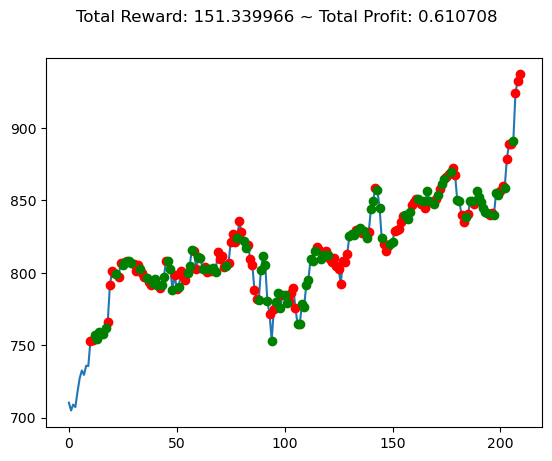

In [8]:
env_seen = gym.make('stocks-v0', frame_bound=(1800, 2000), window_size=10) # make a new environment with seen data
obs = env_seen.reset()

while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env_seen.step(action)
    if done:
        print('info:', info)
        env_seen.render_all()
        break

info: {'total_reward': 71.6504470000001, 'total_profit': 0.2921927484069965, 'position': 1}


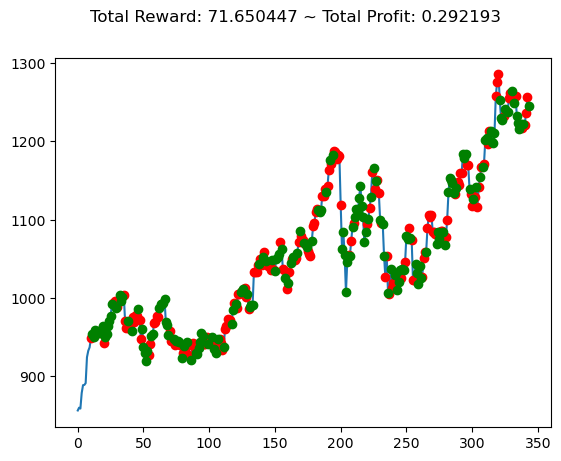

In [4]:
env_prediction = gym.make('stocks-v0', frame_bound=(2000,-1), window_size=10) # make a new environment with unseen data
obs = env_prediction.reset()

while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env_prediction.step(action)
    if done:
        print('info:', info)
        env_prediction.render_all()
        break